In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')


Bad key "text.kerning_factor" on line 4 in
/Users/sarasharick/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
va_cases_df = pd.read_csv('VDH-COVID-19-PublicUseDataset-Cases.csv')
va_cases_df['Report Date'] = pd.to_datetime(va_cases_df['Report Date'])
va_cases_df['Report Date'].dt.strftime("%y/%m/%d")
va_cases_df = va_cases_df.set_index('Report Date')
va_cases_df = va_cases_df.sort_index(ascending=True)
VA_grouped = va_cases_df.groupby(['Report Date'])

In [3]:
va_tests_df = pd.read_csv('VDH-COVID-19-PublicUseDataset-Tests_by-LabReportDate.csv')
va_tests_df['Lab Report Date'] = pd.to_datetime(va_tests_df['Lab Report Date'], errors='coerce')
va_tests_df['Lab Report Date'].dt.strftime("%y/%m/%d")
va_tests_df = va_tests_df.set_index('Lab Report Date')
va_tests_df = va_tests_df.sort_index(ascending=True)
VA_tests_grouped = va_tests_df.groupby(['Lab Report Date'])

In [4]:
VA_cases_cumsum = VA_grouped['Total Cases'].sum()
VA_cases_daily = VA_cases_cumsum.diff(1)
VA_hosp_cumsum = VA_grouped['Hospitalizations'].sum()
VA_hosp_daily = VA_hosp_cumsum.diff(1)
VA_deaths_cumsum = VA_grouped['Deaths'].sum()
VA_deaths_daily = VA_deaths_cumsum.diff(1)

In [5]:
FX = va_cases_df.loc[va_cases_df['Locality'] == 'Fairfax']
FX_cases_cumsum = FX['Total Cases']
FX_cases_daily = FX_cases_cumsum.diff(1)

VA_minus_FX = VA_cases_daily - FX_cases_daily

In [6]:
VA_tests_daily = VA_tests_grouped['Number of PCR Testing Encounters'].sum()
#VA_tests_daily = VA_tests_cumsum.diff(1)
VA_pos_tests_daily = VA_tests_grouped['Number of Positive PCR Testing Encounters'].sum()
#VA_pos_tests_daily = VA_pos_tests_cumsum.diff(1)

In [7]:
dates = []
for date in FX.index:
    dates.append(str(date)[5:10])

In [8]:
Virginia_COVID_19 = pd.DataFrame(list(zip(dates, VA_cases_daily, VA_hosp_daily, VA_deaths_daily, FX_cases_daily, VA_minus_FX, VA_tests_daily, VA_pos_tests_daily)))

In [9]:
Virginia_COVID_19.columns = ['dates', 'VA_cases_daily', 'VA_hosp_daily', 'VA_deaths_daily', 'FX_cases_daily', 'VA_minus_FX', 'VA_tests_daily', 'VA_pos_tests_daily']

In [10]:
len(Virginia_COVID_19)

107

In [11]:
Virginia_COVID_19['VA_cases_daily_rolling_7'] = Virginia_COVID_19['VA_cases_daily'].rolling(window=7).mean()
Virginia_COVID_19['hosp_rolling_7'] = Virginia_COVID_19['VA_hosp_daily'].rolling(window=7).mean()
Virginia_COVID_19['deaths_rolling_7'] = Virginia_COVID_19['VA_deaths_daily'].rolling(window=7).mean()
Virginia_COVID_19['FX_rolling_7'] = Virginia_COVID_19['FX_cases_daily'].rolling(window=7).mean()
Virginia_COVID_19['sans_FX_rolling_7'] = Virginia_COVID_19['VA_minus_FX'].rolling(window=7).mean()
Virginia_COVID_19['VA_tests_rolling_7'] = Virginia_COVID_19['VA_tests_daily'].rolling(window=7).mean()
Virginia_COVID_19['VA_pos_tests_rolling_7'] = Virginia_COVID_19['VA_pos_tests_daily'].rolling(window=7).mean()

In [12]:
Virginia_COVID_19.tail()

,dates,VA_cases_daily,VA_hosp_daily,VA_deaths_daily,FX_cases_daily,VA_minus_FX,VA_tests_daily,VA_pos_tests_daily,VA_cases_daily_rolling_7,hosp_rolling_7,deaths_rolling_7,FX_rolling_7,sans_FX_rolling_7,VA_tests_rolling_7,VA_pos_tests_rolling_7
102,06-27,677.0,49.0,24.0,75.0,602.0,10828,684,543.428571,44.714286,16.714286,55.285714,488.142857,9928.285714,764.285714
103,06-28,489.0,16.0,8.0,50.0,439.0,11887,814,534.571429,42.285714,17.285714,51.285714,483.285714,10003.571429,721.285714
104,06-29,453.0,28.0,8.0,62.0,391.0,9849,781,532.000000,42.142857,17.142857,48.714286,483.285714,9709.857143,697.571429
105,06-30,598.0,39.0,23.0,10.0,588.0,10303,624,541.857143,41.428571,16.857143,38.714286,503.142857,9810.142857,687.857143
106,07-01,416.0,59.0,23.0,14.0,402.0,9269,576,527.000000,43.857143,17.857143,39.428571,487.571429,9822.285714,677.714286


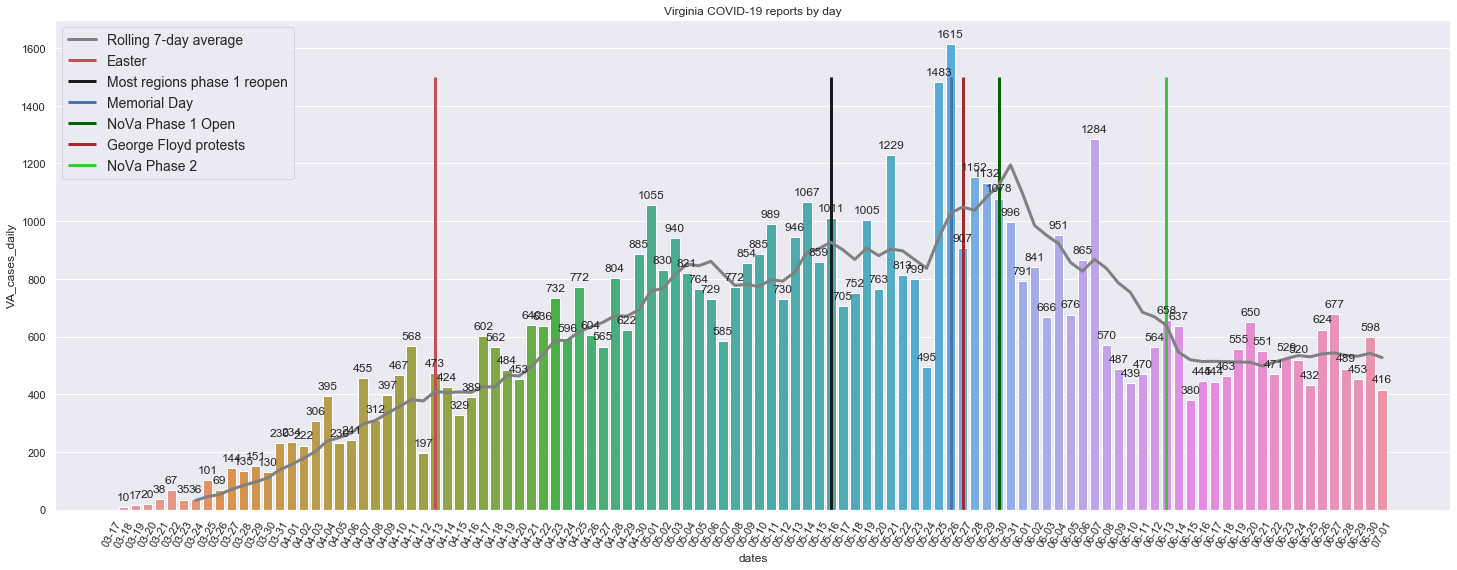

In [13]:
plt.figure(figsize=(25, 9))
reports_daily = sns.barplot(x='dates', y='VA_cases_daily', data=Virginia_COVID_19)
for p in reports_daily.patches:
    reports_daily.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.vlines(x=27, ymin=0, ymax=1500, color='r', label='Easter', linewidth=3)
plt.vlines(x=60, ymin=0, ymax=1500, color='k', label='Most regions phase 1 reopen', linewidth=3)
plt.vlines(x=70, ymin=0, ymax=1500, color='b', label='Memorial Day', linewidth=3)
plt.vlines(x=74, ymin=0, ymax=1500, color='darkgreen', label='NoVa Phase 1 Open', linewidth=3)
plt.vlines(x=71, ymin=0, ymax=1500, color='brown', label='George Floyd protests', linewidth=3)
plt.vlines(x=88, ymin=0, ymax=1500, color='limegreen', label='NoVa Phase 2', linewidth=3)
plt.plot(Virginia_COVID_19['VA_cases_daily_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.legend(loc="upper left", fontsize=14)
plt.title('Virginia COVID-19 reports by day')
plt.savefig('Viginia daily COVID-19 reports')
plt.show()

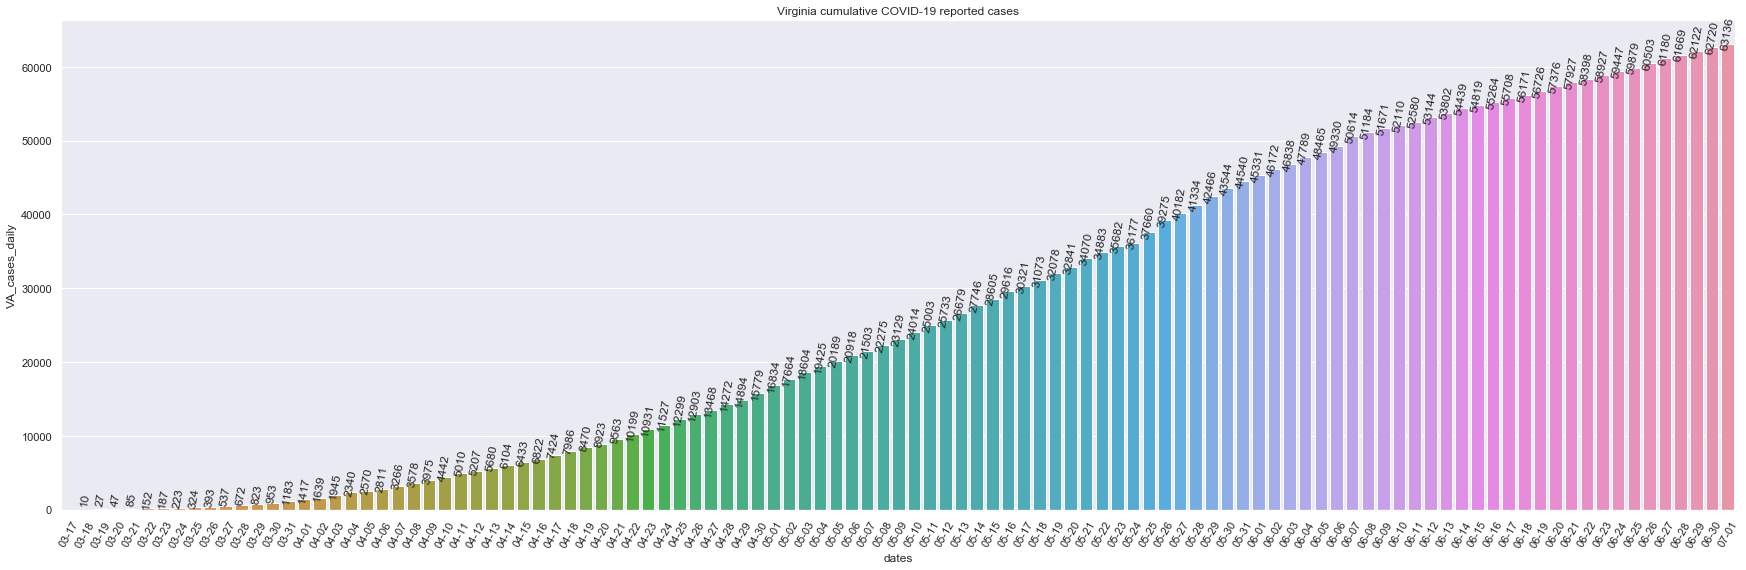

In [14]:
plt.figure(figsize=(30, 9))
cases_plot = sns.barplot(x='dates', y=Virginia_COVID_19.VA_cases_daily.cumsum(), data=Virginia_COVID_19)
for p in cases_plot.patches:
    cases_plot.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points', rotation=80)
plt.xticks(rotation=60)
plt.title('Virginia cumulative COVID-19 reported cases')
#plt.savefig('Viginia cumulative COVID-19 reports')
plt.show()

In [15]:
print(VA_cases_cumsum[-1])

63203


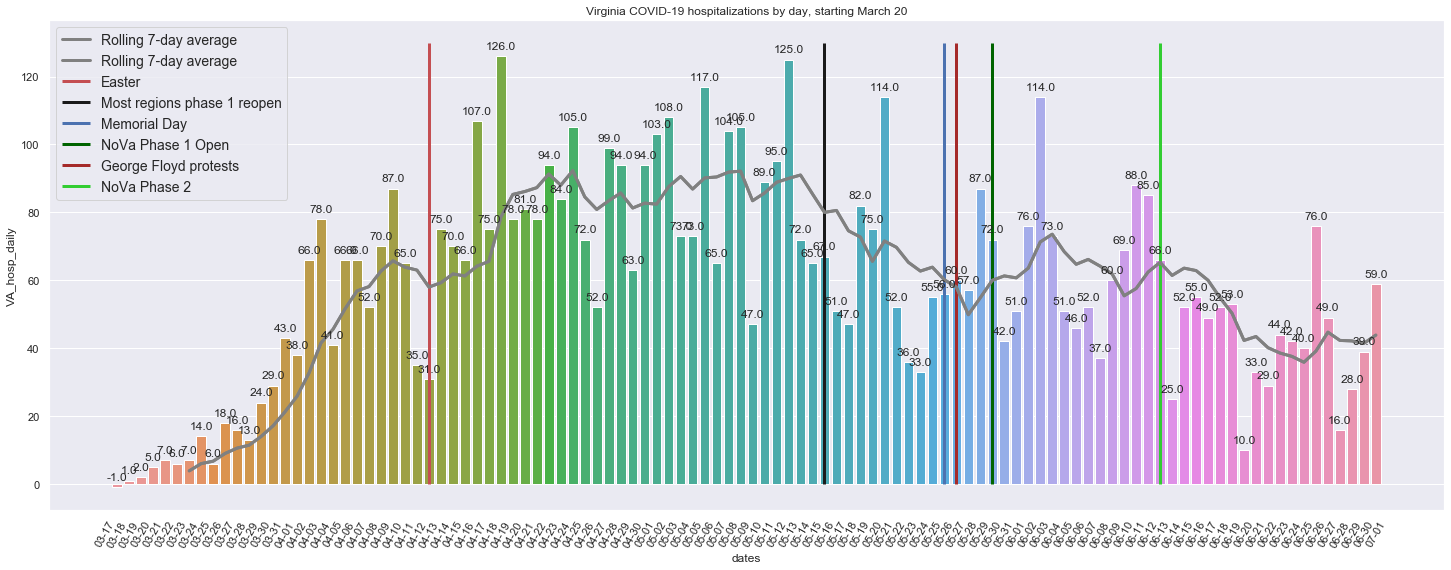

In [16]:
plt.figure(figsize=(25, 9))
hosp_daily = sns.barplot(x='dates', y='VA_hosp_daily', data=Virginia_COVID_19)
for p in hosp_daily.patches:
    hosp_daily.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.plot(Virginia_COVID_19['hosp_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.vlines(x=27, ymin=0, ymax=130, color='r', label='Easter', linewidth=3)
plt.vlines(x=60, ymin=0, ymax=130, color='k', label='Most regions phase 1 reopen', linewidth=3)
plt.vlines(x=70, ymin=0, ymax=130, color='b', label='Memorial Day', linewidth=3)
plt.vlines(x=74, ymin=0, ymax=130, color='darkgreen', label='NoVa Phase 1 Open', linewidth=3)
plt.vlines(x=71, ymin=0, ymax=130, color='brown', label='George Floyd protests', linewidth=3)
plt.vlines(x=88, ymin=0, ymax=130, color='limegreen', label='NoVa Phase 2', linewidth=3)
plt.plot(Virginia_COVID_19['hosp_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
#plt.xlim(12)
plt.legend(loc="upper left", fontsize=14)
plt.title('Virginia COVID-19 hospitalizations by day, starting March 20')
plt.show()

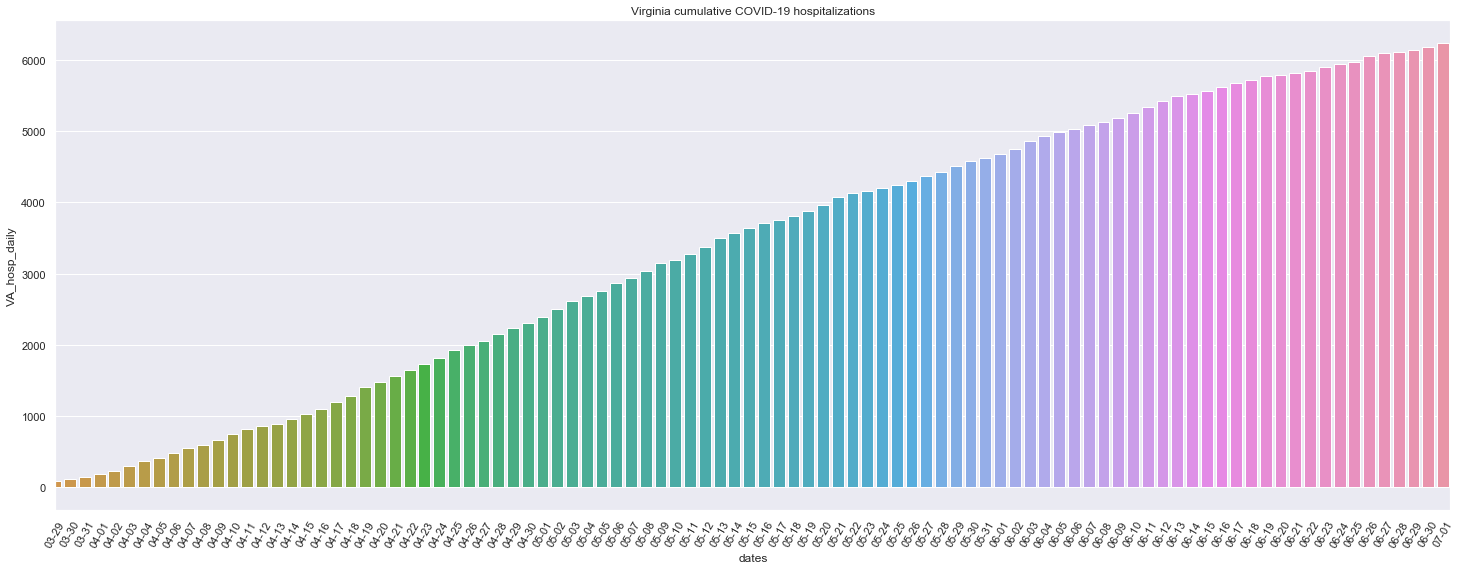

In [17]:
plt.figure(figsize=(25, 9))
hosp_cum = sns.barplot(x='dates', y=Virginia_COVID_19.VA_hosp_daily.cumsum(), data=Virginia_COVID_19)
#for p in hosp_cum.patches:
    #hosp_cum.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.xlim(12)
plt.title('Virginia cumulative COVID-19 hospitalizations')
#plt.savefig('Viginia cumulative COVID-19 reports as of March 30')
plt.show()

In [18]:
print(VA_hosp_cumsum[-1])

6262


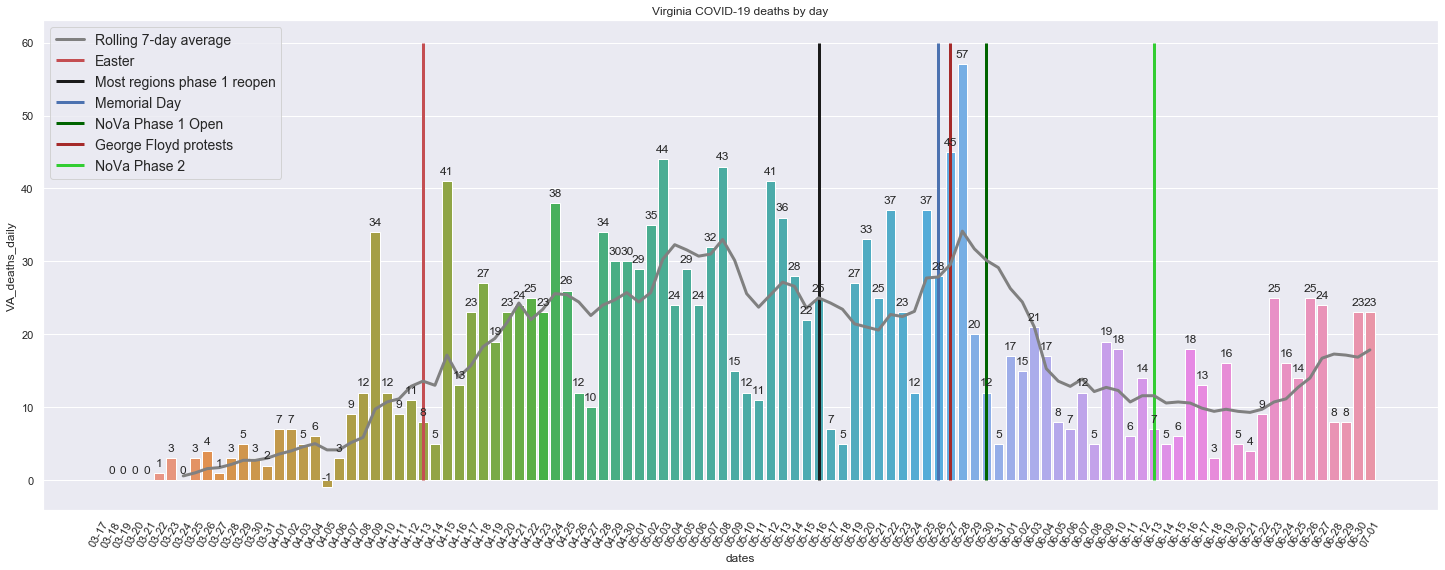

In [19]:
plt.figure(figsize=(25, 9))
death_daily = sns.barplot(x='dates', y='VA_deaths_daily', data=Virginia_COVID_19)
for p in death_daily.patches:
    death_daily.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.plot(Virginia_COVID_19['deaths_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.vlines(x=27, ymin=0, ymax=60, color='r', label='Easter', linewidth=3)
plt.vlines(x=60, ymin=0, ymax=60, color='k', label='Most regions phase 1 reopen', linewidth=3)
plt.vlines(x=70, ymin=0, ymax=60, color='b', label='Memorial Day', linewidth=3)
plt.vlines(x=74, ymin=0, ymax=60, color='darkgreen', label='NoVa Phase 1 Open', linewidth=3)
plt.vlines(x=71, ymin=0, ymax=60, color='brown', label='George Floyd protests', linewidth=3)
plt.vlines(x=88, ymin=0, ymax=60, color='limegreen', label='NoVa Phase 2', linewidth=3)
plt.legend(loc="upper left", fontsize=14)
plt.title('Virginia COVID-19 deaths by day')
plt.show()

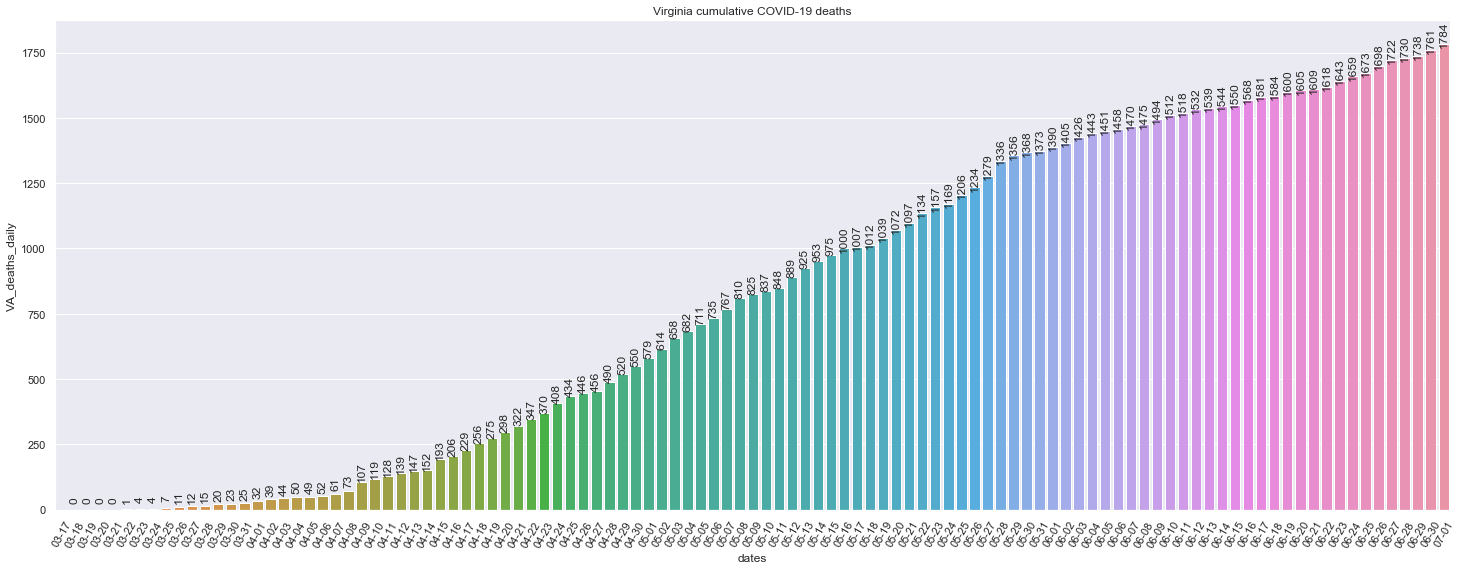

In [20]:
plt.figure(figsize=(25, 9))
death_cum = sns.barplot(x='dates', y=Virginia_COVID_19.VA_deaths_daily.cumsum(), data=Virginia_COVID_19)
for p in death_cum.patches:
    death_cum.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points', rotation=90)
plt.xticks(rotation=60)
plt.title('Virginia cumulative COVID-19 deaths')
#plt.savefig('Viginia cumulative COVID-19 deaths as of March 29')
plt.show()

In [21]:
print(VA_deaths_cumsum[-1])

1786


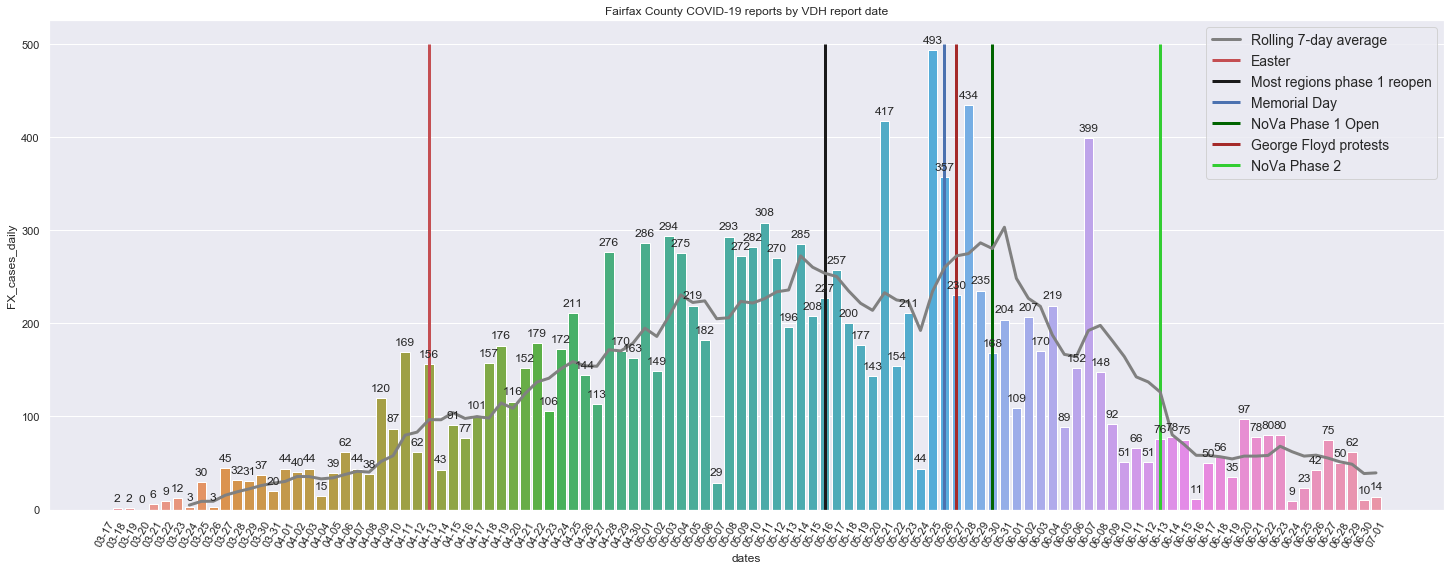

In [22]:
plt.figure(figsize=(25, 9))
FX_reports_daily = sns.barplot(x='dates', y='FX_cases_daily', data=Virginia_COVID_19)
for p in FX_reports_daily.patches:
    FX_reports_daily.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), 
                              textcoords='offset points')
plt.xticks(rotation=60)
plt.plot(Virginia_COVID_19['FX_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.vlines(x=27, ymin=0, ymax=500, color='r', label='Easter', linewidth=3)
plt.vlines(x=60, ymin=0, ymax=500, color='k', label='Most regions phase 1 reopen', linewidth=3)
plt.vlines(x=70, ymin=0, ymax=500, color='b', label='Memorial Day', linewidth=3)
plt.vlines(x=74, ymin=0, ymax=500, color='darkgreen', label='NoVa Phase 1 Open', linewidth=3)
plt.vlines(x=71, ymin=0, ymax=500, color='brown', label='George Floyd protests', linewidth=3)
plt.vlines(x=88, ymin=0, ymax=500, color='limegreen', label='NoVa Phase 2', linewidth=3)
plt.title('Fairfax County COVID-19 reports by VDH report date')
plt.legend(loc='best', fontsize=14)
plt.savefig('Fairfax County daily COVID-19 reports by VDH report date')
plt.show()

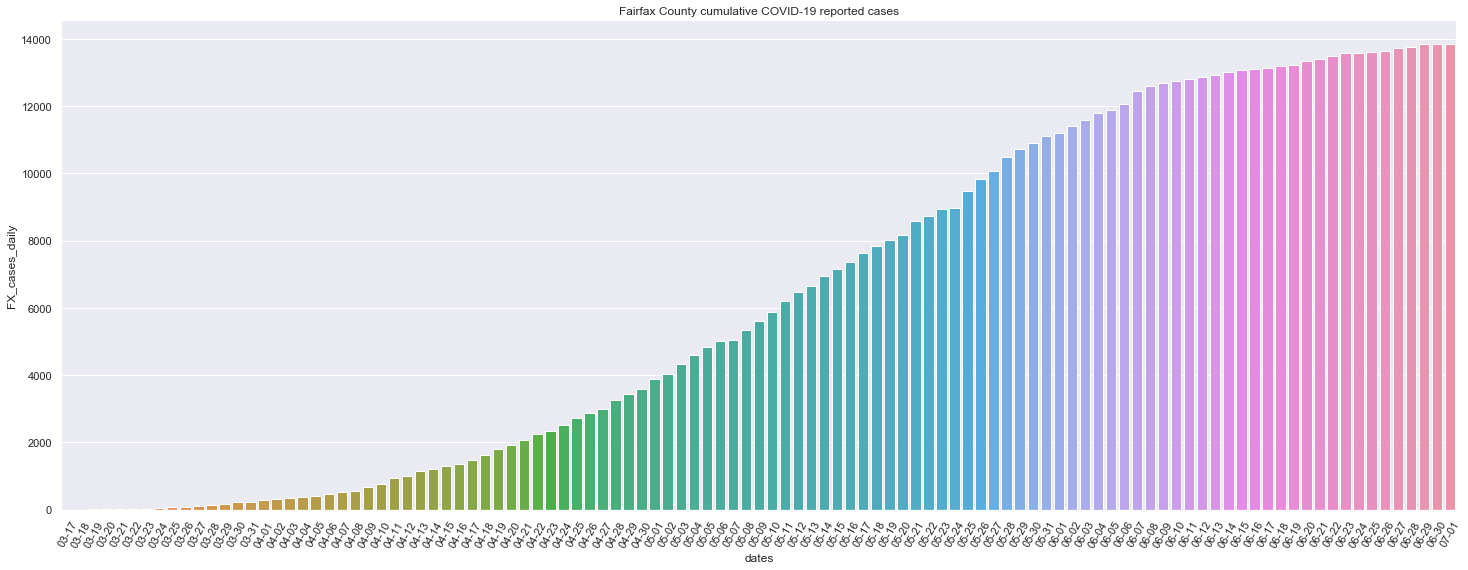

In [23]:
plt.figure(figsize=(25, 9))
FX_reports_cum = sns.barplot(x='dates', y=Virginia_COVID_19.FX_cases_daily.cumsum(), data=Virginia_COVID_19)
#for p in FX_reports_cum.patches:
    #FX_reports_cum.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.title('Fairfax County cumulative COVID-19 reported cases')
#plt.savefig('Viginia cumulative COVID-19 reports as of March 30')
plt.show()

In [24]:
print(FX_cases_cumsum[-1])

13864


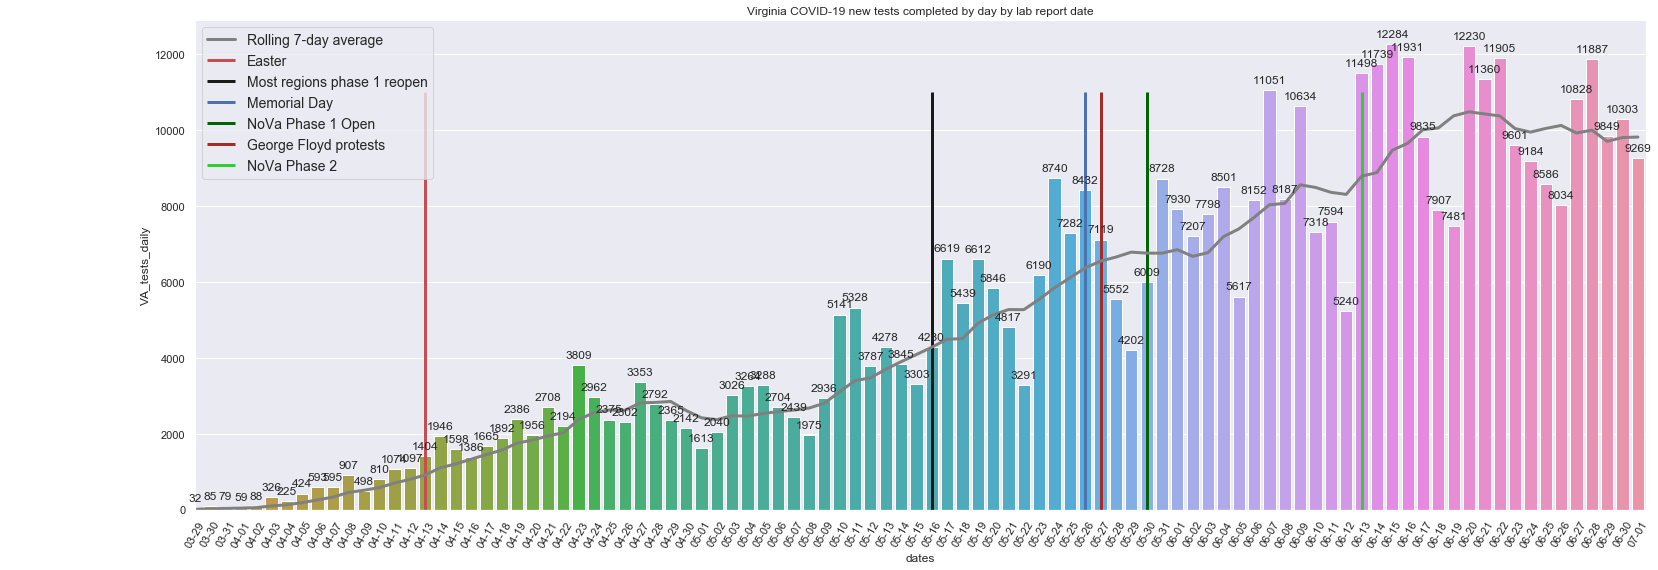

In [25]:
plt.figure(figsize=(26, 9))
tests_daily = sns.barplot(x='dates', y='VA_tests_daily', data=Virginia_COVID_19)
for p in tests_daily.patches:
    tests_daily.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.xlim(12)
plt.plot(Virginia_COVID_19['VA_tests_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.vlines(x=27, ymin=0, ymax=11000, color='r', label='Easter', linewidth=3)
plt.vlines(x=60, ymin=0, ymax=11000, color='k', label='Most regions phase 1 reopen', linewidth=3)
plt.vlines(x=70, ymin=0, ymax=11000, color='b', label='Memorial Day', linewidth=3)
plt.vlines(x=74, ymin=0, ymax=11000, color='darkgreen', label='NoVa Phase 1 Open', linewidth=3)
plt.vlines(x=71, ymin=0, ymax=11000, color='brown', label='George Floyd protests', linewidth=3)
plt.vlines(x=88, ymin=0, ymax=11000, color='limegreen', label='NoVa Phase 2', linewidth=3)
plt.legend(loc="upper left", fontsize=14)
plt.title('Virginia COVID-19 new tests completed by day by lab report date')
plt.show()

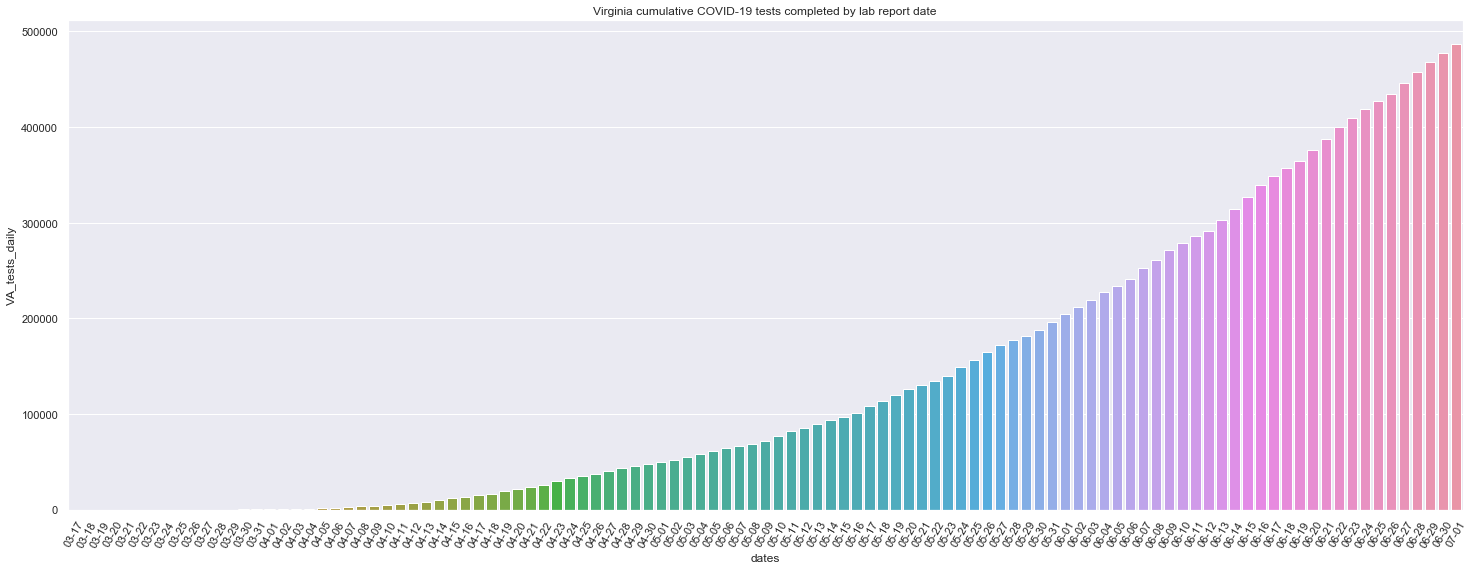

In [26]:
plt.figure(figsize=(25, 9))
tests_cum = sns.barplot(x='dates', y=Virginia_COVID_19.VA_tests_daily.cumsum(), data=Virginia_COVID_19)
#for p in tests_cum.patches:
    #tests_cum.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points', rotation=40)
plt.xticks(rotation=60)
#plt.xlim(12)
plt.title('Virginia cumulative COVID-19 tests completed by lab report date')
#plt.savefig('Viginia cumulative COVID-19 reports as of March 30')
plt.show()

In [27]:
print(Virginia_COVID_19.VA_tests_daily.sum())

487231


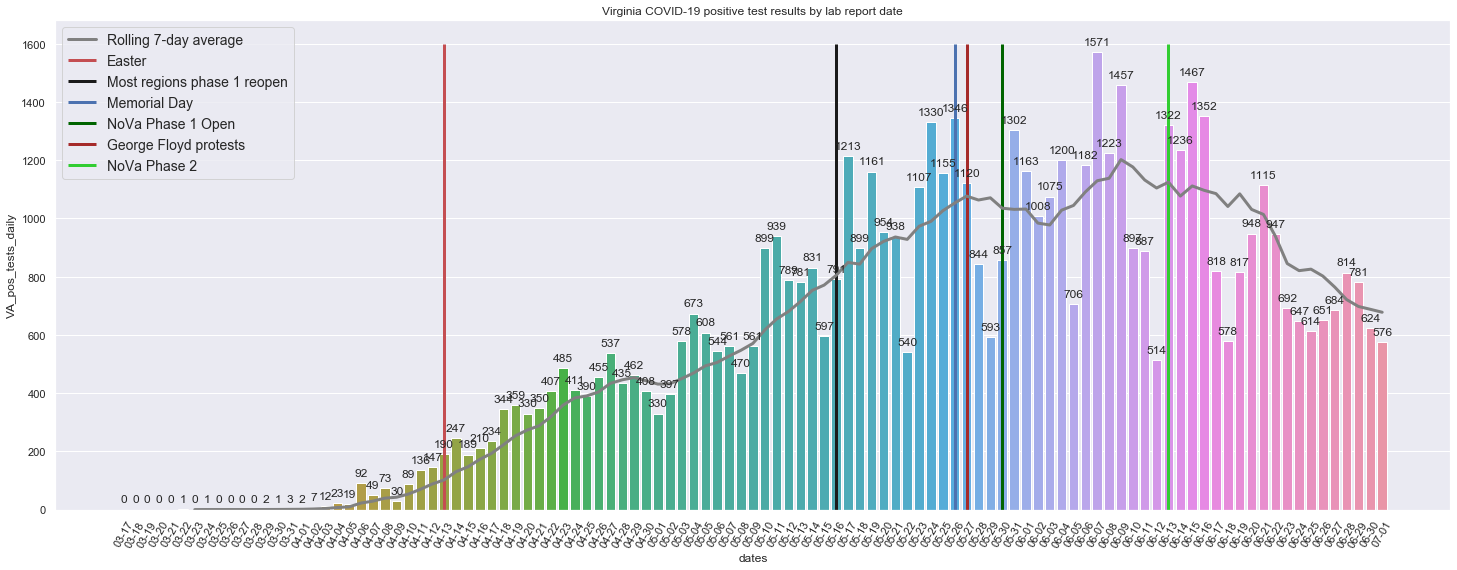

In [28]:
plt.figure(figsize=(25, 9))
pos_lab_daily = sns.barplot(x='dates', y='VA_pos_tests_daily', data=Virginia_COVID_19)
for p in pos_lab_daily.patches:
    pos_lab_daily.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
#plt.xlim(12)
plt.plot(Virginia_COVID_19['VA_pos_tests_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.vlines(x=27, ymin=0, ymax=1600, color='r', label='Easter', linewidth=3)
plt.vlines(x=60, ymin=0, ymax=1600, color='k', label='Most regions phase 1 reopen', linewidth=3)
plt.vlines(x=70, ymin=0, ymax=1600, color='b', label='Memorial Day', linewidth=3)
plt.vlines(x=74, ymin=0, ymax=1600, color='darkgreen', label='NoVa Phase 1 Open', linewidth=3)
plt.vlines(x=71, ymin=0, ymax=1600, color='brown', label='George Floyd protests', linewidth=3)
plt.vlines(x=88, ymin=0, ymax=1600, color='limegreen', label='NoVa Phase 2', linewidth=3)
plt.legend(loc="upper left", fontsize=14)
plt.title('Virginia COVID-19 positive test results by lab report date')
plt.show()

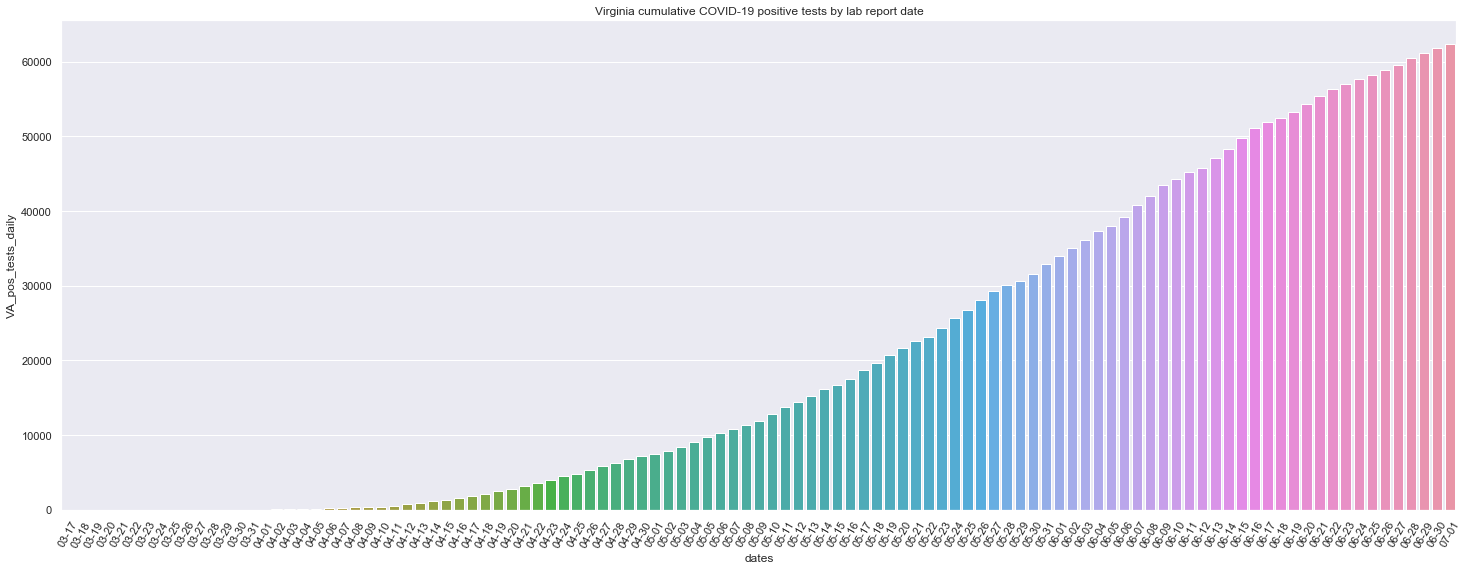

In [29]:
plt.figure(figsize=(25, 9))
pos_lab_cum = sns.barplot(x='dates', y=Virginia_COVID_19.VA_pos_tests_daily.cumsum(), data=Virginia_COVID_19)
#for p in tests_cum.patches:
    #tests_cum.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points', rotation=40)
plt.xticks(rotation=60)
#plt.xlim(12)
plt.title('Virginia cumulative COVID-19 positive tests by lab report date')
#plt.savefig('Viginia cumulative COVID-19 reports as of March 30')
plt.show()

In [30]:
print(Virginia_COVID_19.VA_pos_tests_daily.sum())

62404


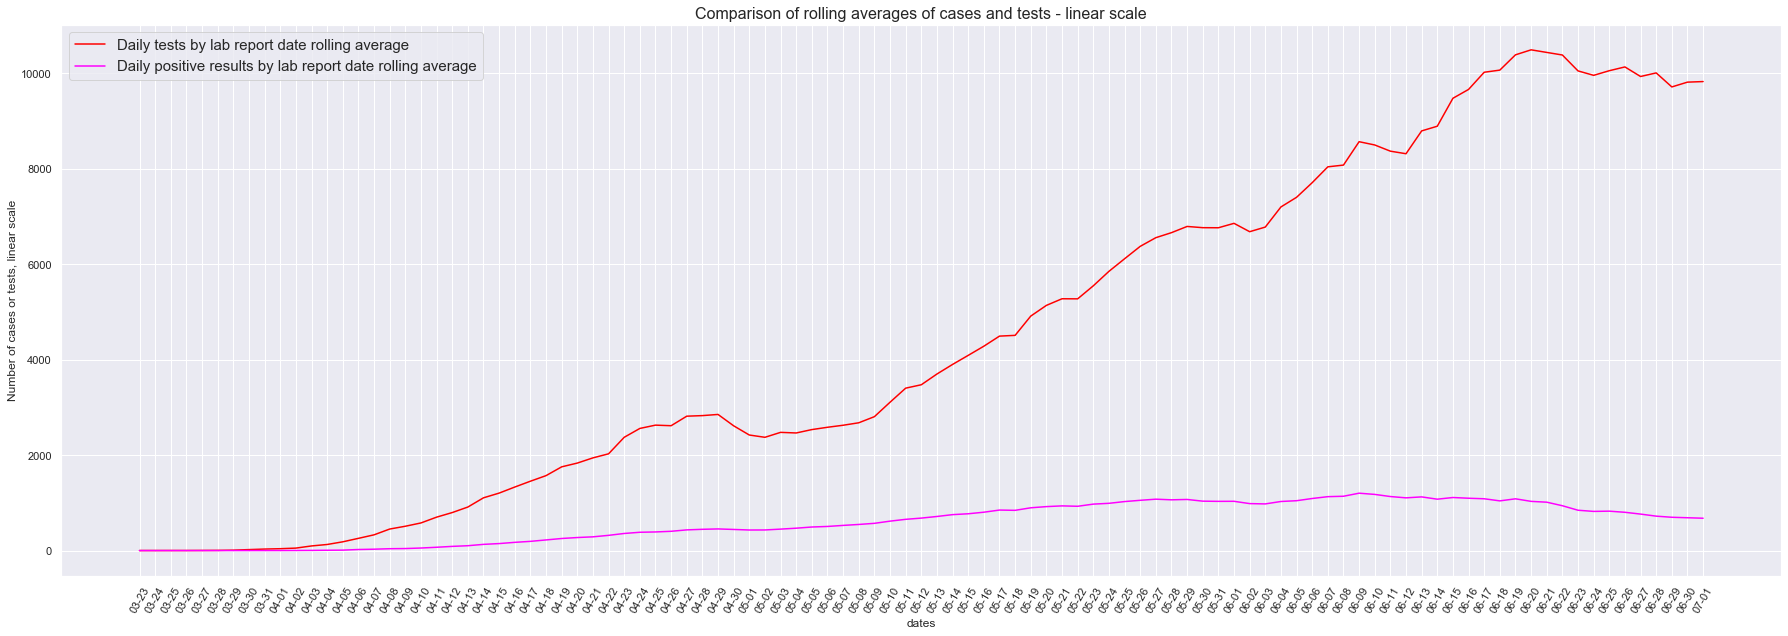

In [31]:
fig = plt.figure(figsize=(25,9))
#sns.lineplot(x='dates', y='VA_cases_daily_rolling_7', data=Virginia_COVID_19, color='black', label='Daily reports by VDH publish date rolling average')
sns.lineplot(x='dates', y='VA_tests_rolling_7', data=Virginia_COVID_19, color='red', label='Daily tests by lab report date rolling average')
sns.lineplot(x='dates', y='VA_pos_tests_rolling_7', data=Virginia_COVID_19, color='magenta', label='Daily positive results by lab report date rolling average')
plt.ylabel('Number of cases or tests, linear scale', fontsize=12)
plt.xticks(rotation=60)
plt.title('Comparison of rolling averages of cases and tests - linear scale', fontsize=16)
plt.legend(loc='best', fontsize=15)
plt.tight_layout()
#plt.savefig('comparison of new test reports and new tests')
plt.show()

In [32]:
df_rolling_7 = Virginia_COVID_19[['VA_cases_daily_rolling_7', 'hosp_rolling_7', 'deaths_rolling_7', 'VA_tests_rolling_7', 'VA_pos_tests_rolling_7']]

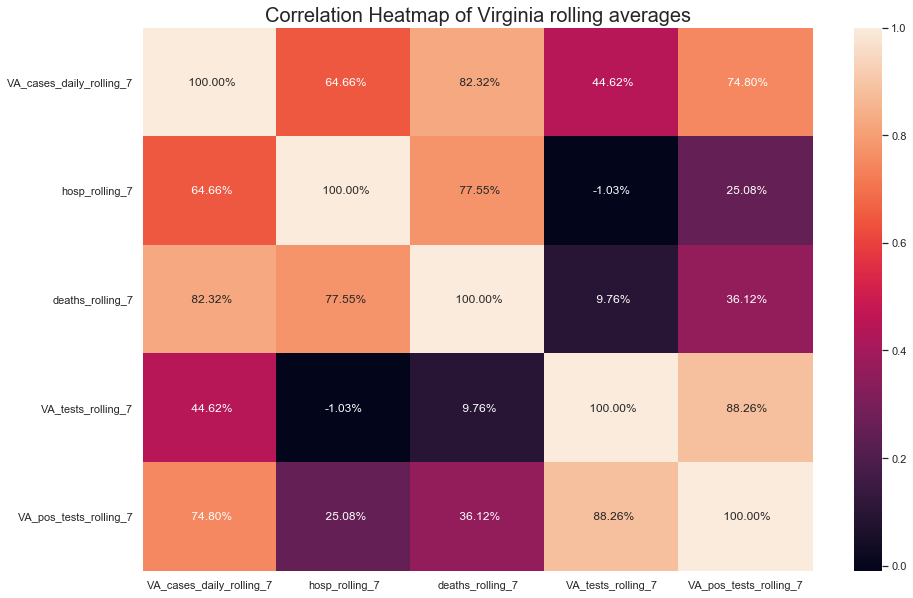

In [33]:
df_rolling_7_corr = df_rolling_7.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_rolling_7_corr, annot=True, fmt=' .2%', ax=ax)
plt.title('Correlation Heatmap of Virginia rolling averages', fontsize=20)
f.savefig('Correlation Heatmap of Virginia rolling averages')

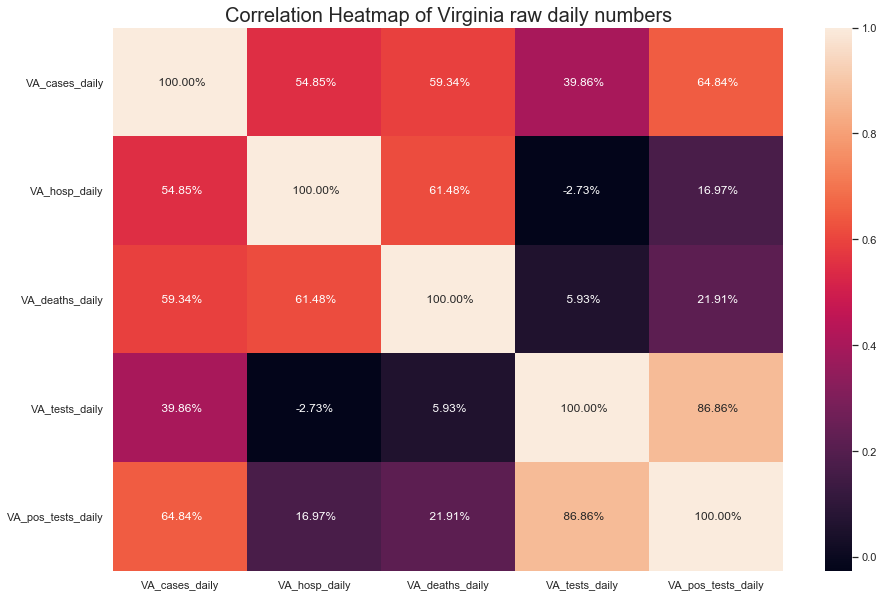

In [34]:
raw_corr = Virginia_COVID_19[['VA_cases_daily', 'VA_hosp_daily', 'VA_deaths_daily', 'VA_tests_daily', 'VA_pos_tests_daily']]

raw_corr = raw_corr.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(raw_corr, annot=True, fmt=' .2%', ax=ax)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of Virginia raw daily numbers', fontsize=20)
plt.show()
f.savefig('Correlation Heatmap of Virginia raw daily numbers')

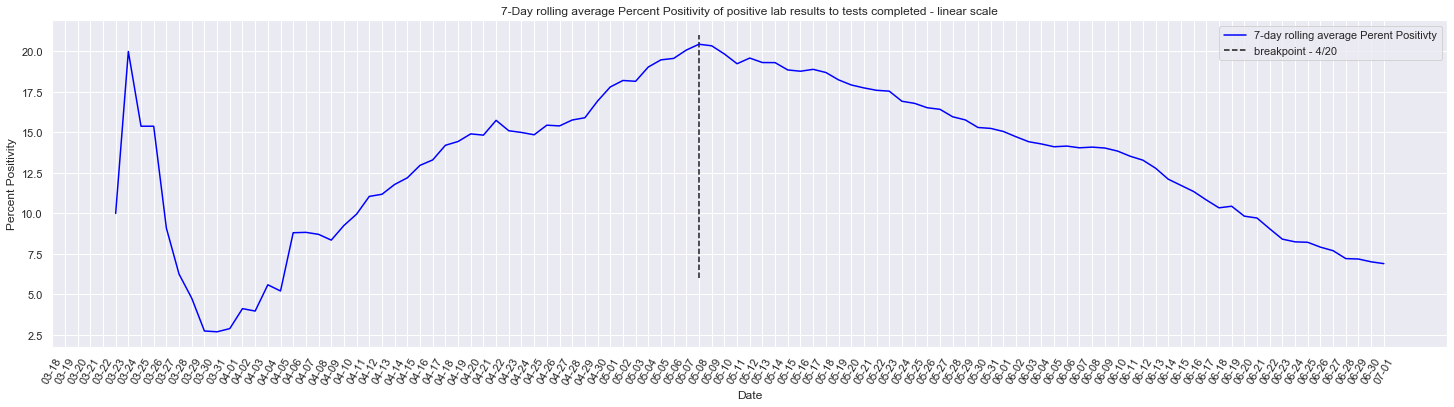

In [35]:
X = Virginia_COVID_19['VA_pos_tests_rolling_7']
y = Virginia_COVID_19['VA_tests_rolling_7']
plt.figure(figsize=(25, 6))
plt.plot(Virginia_COVID_19['dates'], ((X / y) * 100), color='blue', label='7-day rolling average Perent Positivty')
plt.vlines(x=52, ymin=6, ymax=21, color='k', linestyle='--', label='breakpoint - 4/20')
plt.ylabel('Percent Positivity')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.title('7-Day rolling average Percent Positivity of positive lab results to tests completed - linear scale')
plt.legend(loc='best')
plt.show()

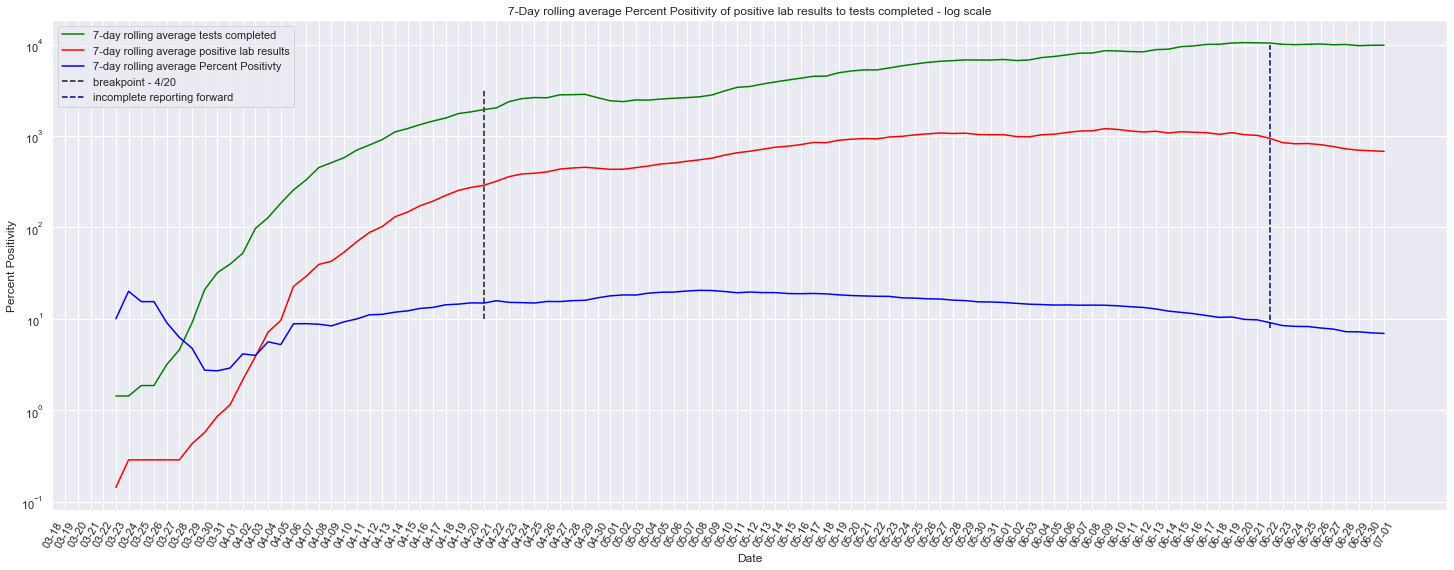

In [36]:
X = Virginia_COVID_19['VA_pos_tests_rolling_7']
y = Virginia_COVID_19['VA_tests_rolling_7']
plt.figure(figsize=(25, 9))
plt.plot(y, color='green', label='7-day rolling average tests completed')
plt.plot(X, color='red', label='7-day rolling average positive lab results')
plt.plot(Virginia_COVID_19['dates'], ((X / y) * 100), color='blue', label='7-day rolling average Percent Positivty')
plt.yscale('log')
plt.vlines(x=35, ymin=10**1, ymax=10**3.5, color='k', linestyle='--', label='breakpoint - 4/20')
plt.vlines(x=97, ymin=10**.9, ymax=10**4, color='darkblue', linestyle='--', label='incomplete reporting forward')
plt.ylabel('Percent Positivity')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.title('7-Day rolling average Percent Positivity of positive lab results to tests completed - log scale')
plt.legend(loc='best')
plt.show()